##Hello! I am Suhrid.

#### This is the python notebook file which has all the code implementaations for the EE 585: Convex Optimization Course Project.

#### The file has separate sections for different types of Optimizers. Please refer to the project report for more clarity.

#### All the optimizers have been implemented from scratch(without using any predefined functions/libraries)

# Gradient Descent Variants

In [2]:
import torch
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
from numpy import meshgrid


Data Preparation

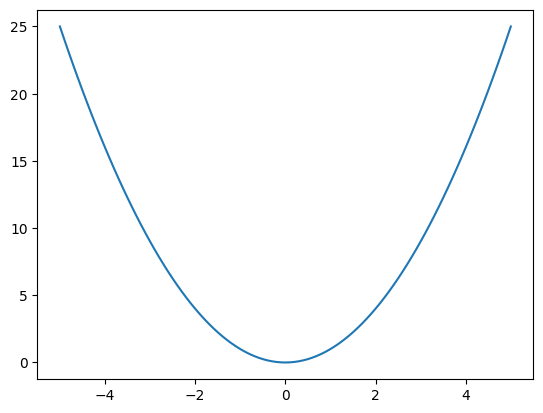

In [ ]:
#PREPARING DATA
# Objective Function Definition
def objective(x):
	return x**2.0 #+ 3*x + 4

# Creating a sample objective function
r_min, r_max = -5.0, 5.0
jump = 0.1
X = torch.arange(r_min, r_max+jump, jump).view(-1, 1)
# func = -5 * X
func = objective(X)

# Adding Gaussian noise to the function func and saving it in Y
Y = func
#Y = func + 0.4 * torch.randn(X.size())

# Visualising the sample objective function
plt.plot(X, Y)
# show the plot
plt.show()

Defining Bounds and setting the initial point for the optimizers

In [ ]:
#Understanding how 'bounds' works!

#Bounds is used to set an initial solution for the optimizer to get started

bounds = np.array([[-1.0, 1.0]]) #0th dimension: lower limit || 1st dimension: upper limit
print(bounds[:, 0], rand(len(bounds)), (bounds[:, 1] - bounds[:, 0]))

#The initial point solution is generated by adding a random fraction of the range to the lower bound for each dimension. This ensures that the initial point falls within the specified bounds for each dimension.
solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
print(solution)

[-1.] [0.36586267] [2.]
[-0.95164541]


Defining custom numerical derivative calculator

In [19]:
#The custom numerical derivative calculator
#As promised, I will not use any library! Even for calculating derivatives
import numpy as np

def numerical_derivative(objective, point, step_size=1e-6):
    """
    Calculate the numerical derivative of an objective function at a given point using finite differences.

    Parameters:
        objective (function): The objective function to differentiate.
        point (array-like): The point at which to compute the derivative.
        step_size (float, optional): The step size used in the finite difference method. Default is 1e-6.

    Returns:
        ndarray: The numerical derivatives with respect to each variable at the given point.
    """
    num_variables = len(point)
    gradient = np.zeros(num_variables)

    for i in range(num_variables):
        # Perturb the i-th variable
        point_plus = point.copy()
        point_plus[i] += step_size

        # Compute the finite difference
        delta = objective(*point_plus) - objective(*point)
        gradient[i] = delta / step_size

    return gradient

# Example usage
def objective_function(x):
    return x**2.0 + 3*x + 4

point = [4]  # Example point
gradient = numerical_derivative(objective_function, point)
print("Numerical gradient:", gradient)


Numerical gradient: [11.000001]


## Vanilla Gradient Descent

Vanilla gradient descent is a fundamental optimization algorithm used to minimize a loss function by iteratively adjusting the parameters in the direction of the negative gradient. It is a simple yet effective approach for finding the minimum of a function by taking small steps proportional to the gradient at each point."

In [16]:
# Gradient Descent Algorithm
def gradient_descent(objective_fn, bounds, n_iter, step_size):
  gd_soln = []
  gd_soln_eval = []
  # generate an initial point
  solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
  print("The initial random starting point is set as: {0}".format(solution))
  # run the gradient descent
  for i in range(n_iter):
    # calculate gradient
    gradient = numerical_derivative(objective_fn, solution)
    print(gradient)
    # take a step
    solution = solution - step_size * gradient
    gd_soln.append(solution)
    # evaluate candidate point
    solution_eval = objective_fn(solution)
    gd_soln_eval.append(solution_eval)
    # report progress
    print('Iteration: %d || f(%s) = %.5f' % (i, solution, solution_eval))
  return [gd_soln, gd_soln_eval]


The initial random starting point is set as: [0.42461674]
[0.84923449]
Iteration: 0 || f([0.33969329]) = 0.11539
[0.67938759]
Iteration: 1 || f([0.27175454]) = 0.07385
[0.54351007]
Iteration: 2 || f([0.21740353]) = 0.04726
[0.43480806]
Iteration: 3 || f([0.17392272]) = 0.03025
[0.34784645]
Iteration: 4 || f([0.13913808]) = 0.01936
[0.27827716]
Iteration: 5 || f([0.11131036]) = 0.01239
[0.22262173]
Iteration: 6 || f([0.08904819]) = 0.00793
[0.17809738]
Iteration: 7 || f([0.07123845]) = 0.00507
[0.1424779]
Iteration: 8 || f([0.05699066]) = 0.00325
[0.11398232]
Iteration: 9 || f([0.04559243]) = 0.00208
[0.09118586]
Iteration: 10 || f([0.03647384]) = 0.00133
[0.07294869]
Iteration: 11 || f([0.02917897]) = 0.00085
[0.05835895]
Iteration: 12 || f([0.02334308]) = 0.00054
[0.04668716]
Iteration: 13 || f([0.01867436]) = 0.00035
[0.03734973]
Iteration: 14 || f([0.01493939]) = 0.00022
[0.02987978]
Iteration: 15 || f([0.01195141]) = 0.00014
[0.02390383]
Iteration: 16 || f([0.00956103]) = 0.00009
[

<ipython-input-43-e6983e556fed>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Iteration: %d || f(%s) = %.5f' % (i, solution, solution_eval))


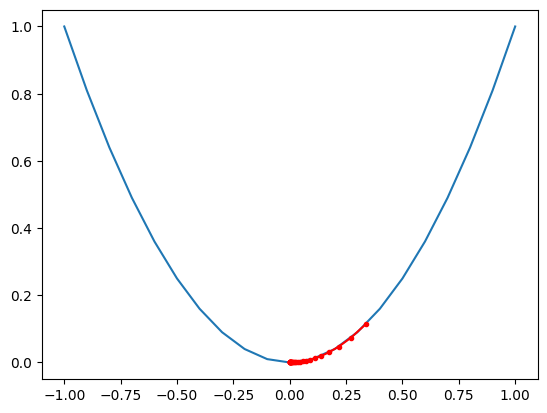

In [ ]:
# define range for input
bounds = np.array([[-1.0, 1.0]])
# define the total iterations for the algorithm
n_iter = 30
# define the maximum step size for the algorithm
step_size = 0.1
# perform the gradient descent search
gd_soln, gd_soln_eval = gradient_descent(objective, bounds, n_iter, step_size)

#Plotting the progress for the algorithm
# sample input range uniformly at 0.1 increments
inputs = np.arange(bounds[0,0], bounds[0,1]+0.1, 0.1)#np.arange(-5, 5, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
plt.plot(inputs, results)
# plot the solutions found
plt.plot(gd_soln, gd_soln_eval, '.-', color='red')
# show the plot
plt.show()

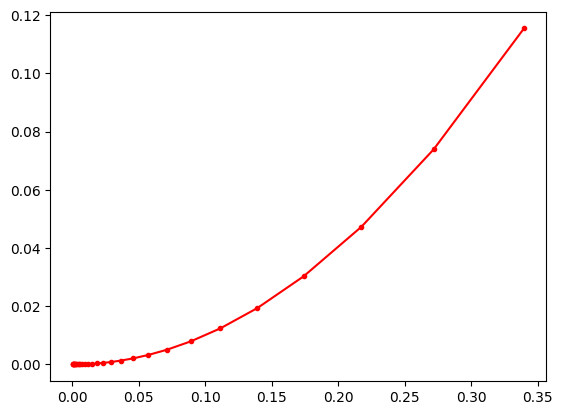

In [ ]:
#Plot for GD ONLY
plt.plot(gd_soln, gd_soln_eval, '.-', color='red')
plt.show()

## Gradient Descent with Momentum

Momentum enhances gradient descent optimization by incorporating inertia into the search process. This inertia enables the algorithm to accumulate momentum in a specific direction within the search space, helping to navigate through noisy gradients and traverse flat regions more efficiently.

In [15]:
# Gradient Descent with Momentum Algorithm
def gradient_descent_momentum(objective_fn, bounds, n_iter, step_size, momentum):
  gdm_soln = []
  gdm_soln_eval = []
  # generate an initial point
  solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
  print("The initial random starting point is set as: {0}".format(solution))
  change = 0.0 #stores the change for the previous steps
  # run the gradient descent with momentum
  for i in range(n_iter):
    # calculate gradient
    gradient = numerical_derivative(objective_fn, solution)
    print(gradient)
    new_change = (step_size * gradient) + (momentum * change)
    # take a step
    solution = solution - new_change
    change = new_change #store current change as history for next step
    gdm_soln.append(solution)
    # evaluate candidate point
    solution_eval = objective_fn(solution)
    gdm_soln_eval.append(solution_eval)
    # report progress
    print('Iteration: %d || f(%s) = %.5f' % (i, solution, solution_eval))
  return [gdm_soln, gdm_soln_eval]

The initial random starting point is set as: [0.86153598]
[1.72307296]
Iteration: 0 || f([0.68922868]) = 0.47504
[1.37845837]
Iteration: 1 || f([0.49969066]) = 0.24969
[0.99938232]
Iteration: 2 || f([0.34289102]) = 0.11757
[0.68578304]
Iteration: 3 || f([0.22727282]) = 0.05165
[0.45454665]
Iteration: 4 || f([0.1471327]) = 0.02165
[0.2942664]
Iteration: 5 || f([0.09366402]) = 0.00877
[0.18732905]
Iteration: 6 || f([0.05889052]) = 0.00347
[0.11778203]
Iteration: 7 || f([0.03668026]) = 0.00135
[0.07336152]
Iteration: 8 || f([0.02268103]) = 0.00051
[0.04536306]
Iteration: 9 || f([0.01394496]) = 0.00019
[0.02789091]
Iteration: 10 || f([0.00853504]) = 0.00007
[0.01707109]
Iteration: 11 || f([0.00520496]) = 0.00003
[0.01041092]
Iteration: 12 || f([0.00316484]) = 0.00001
[0.00633069]
Iteration: 13 || f([0.00191974]) = 0.00000
[0.00384048]
Iteration: 14 || f([0.00116216]) = 0.00000


<ipython-input-46-aea23f3578e7>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Iteration: %d || f(%s) = %.5f' % (i, solution, solution_eval))


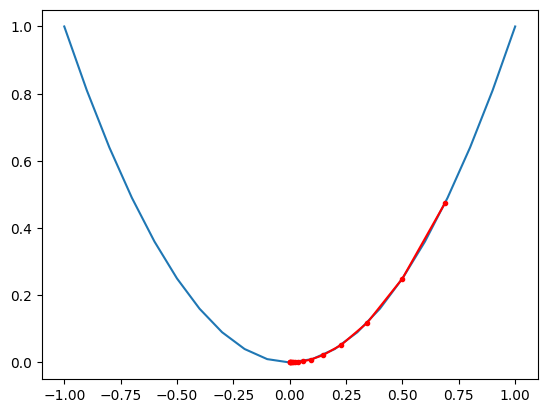

In [ ]:
# define range for input
bounds = np.array([[-1.0, 1.0]])
# define the total iterations for the algorithm
n_iter = 15
# define the maximum step size for the algorithm
step_size = 0.1
# setting the momentum
momentum = 0.3
# perform the gradient descent search
gd_soln, gd_soln_eval = gradient_descent_momentum(objective, bounds, n_iter, step_size, momentum)

#Plotting the progress for the algorithm
# sample input range uniformly at 0.1 increments
inputs = np.arange(bounds[0,0], bounds[0,1]+0.1, 0.1)#np.arange(-5, 5, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
plt.plot(inputs, results)
# plot the solutions found
plt.plot(gd_soln, gd_soln_eval, '.-', color='red')
# show the plot
plt.show()

It can be observed that with all other settings kept the same as Vanilla GD, the introduction of momentum helps minimize the same objective in half the number of iterations.

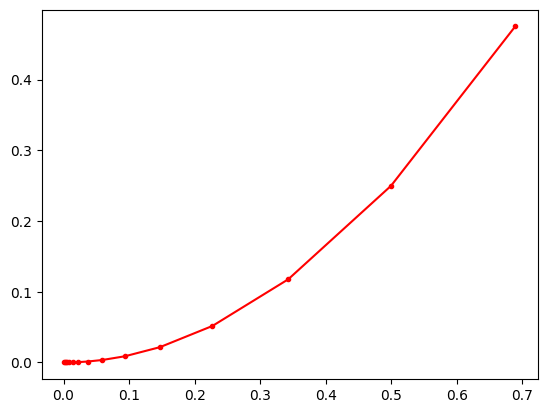

In [ ]:
# plot the solutions found
plt.plot(gd_soln, gd_soln_eval, '.-', color='red')
# show the plot
plt.show()

## Gradient Descent with Nesterov Momentum

Nesterov Momentum, also known as Nesterov Accelerated Gradient (NAG), is an enhancement of the traditional momentum method in optimization. Unlike conventional momentum, Nesterov Momentum updates the parameters based on the partial derivative of the projected future position rather than the current position, allowing for more accurate and efficient updates.

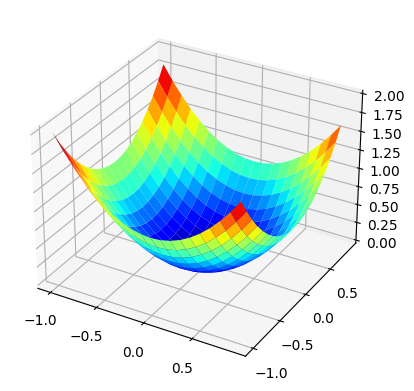

In [ ]:
#Lets define a 2D objective function for this case

# objective function
def TwoDim_objective(x, y):
	return x**2.0 + y**2.0

# define range for input
r_min, r_max = -1.0, 1.0
# sample input range uniformly at 0.1 increments
xaxis = np.arange(r_min, r_max, 0.1)
yaxis = np.arange(r_min, r_max, 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = TwoDim_objective(x, y)
# create a surface plot with the jet color scheme
figure = plt.figure()
#axis = figure.gca(projection='3d')
axis = figure.add_subplot(111, projection='3d')
axis.plot_surface(x, y, results, cmap='jet')
# show the plot
plt.show()

Lets see the contour plot for the same

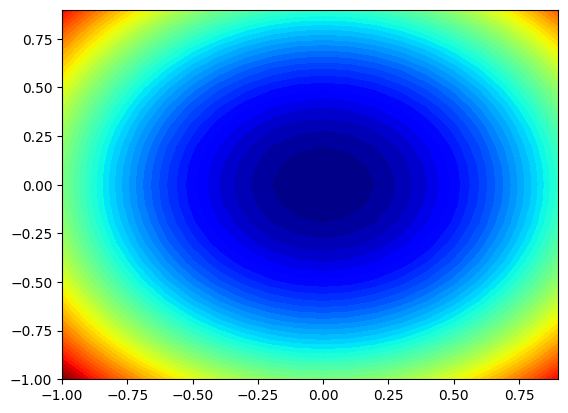

In [ ]:
# define range for input
bounds = np.array([[-1.0, 1.0], [-1.0, 1.0]])
# sample input range uniformly at 0.1 increments
xaxis = np.arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = np.arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = TwoDim_objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
plt.contourf(x, y, results, levels=50, cmap='jet')
# show the plot
plt.show()

In [ ]:
# gradient descent algorithm with nesterov momentum
def gradient_descent_nesterov(objective_fn, bounds, n_iter, step_size, momentum):
 gdN_soln = []
 gdN_soln_eval = []
 # generate an initial point
 solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
 # list of changes made to each variable
 change = [0.0 for _ in range(bounds.shape[0])]#Setting initial change to 0 for both the variables: x & y
 # run the gradient descent
 for it in range(n_iter):
  # calculate the projected solution
  projected = [solution[i] + momentum * change[i] for i in range(solution.shape[0])]
  # calculate the gradient for the projection
  gradient = numerical_derivative(objective_fn, projected) #np.array(projected[0], projected[1])
  # build a solution one variable at a time
  new_solution = list()
  change = (momentum * np.array(change)) - (step_size * np.array(gradient))
  solution = solution + change
  # new_solution.append(value)
  # solution = np.array(new_solution).flatten()
  gdN_soln.append(solution)
  # evaluate candidate point
  solution_eval = objective_fn(solution[0], solution[1])
  gdN_soln_eval.append(solution_eval)
  # report progress
  print('>%d f(%s) = %.5f' % (it, solution, solution_eval))
 return [gdN_soln, gdN_soln_eval]

>0 f([-0.97075105 -0.74172453]) = 1.49251
>1 f([-0.93580403 -0.71502247]) = 1.38699
>2 f([-0.8896895  -0.67978761]) = 1.25366
>3 f([-0.83574192 -0.63856774]) = 1.10623
>4 f([-0.7767322  -0.59348001]) = 0.95553
>5 f([-0.71493394 -0.54626165]) = 0.80953
>6 f([-0.65218543 -0.49831723]) = 0.67367
>7 f([-0.58994691 -0.45076247]) = 0.55122
>8 f([-0.52935297 -0.40446429]) = 0.44381
>9 f([-0.47126028 -0.36007725]) = 0.35174
>10 f([-0.41629041 -0.31807627]) = 0.27447
>11 f([-0.36486824 -0.27878599]) = 0.21085
>12 f([-0.3172559 -0.2424067]) = 0.15941
>13 f([-0.27358272 -0.20903722]) = 0.11854
>14 f([-0.2338713 -0.1786948]) = 0.08663
>15 f([-0.19806013 -0.15133247]) = 0.06213
>16 f([-0.16602298 -0.12685375]) = 0.04366
>17 f([-0.13758541 -0.10512538]) = 0.02998
>18 f([-0.11253865 -0.08598783]) = 0.02006
>19 f([-0.09065123 -0.06926425]) = 0.01302
>20 f([-0.07167848 -0.05476769]) = 0.00814
>21 f([-0.05537028 -0.04230704]) = 0.00486
>22 f([-0.04147726 -0.03169176]) = 0.00272
>23 f([-0.0297556  -0.022

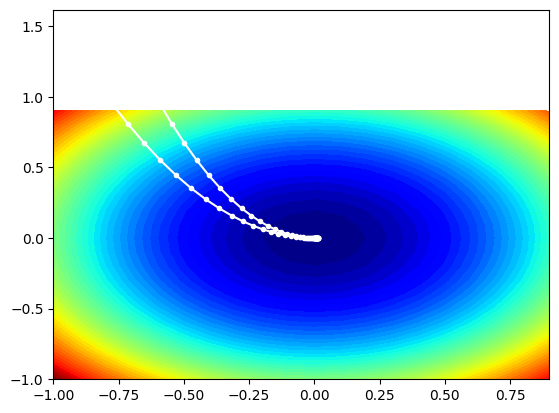

In [ ]:
# from numpy.random import seed
# seed(100)

# define range for input
bounds = np.array([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 50
# define the step size
step_size = 0.01
# define momentum
momentum = 0.8
# perform the gradient descent search with nesterov momentum
gdN_soln, gdN_soln_eval = gradient_descent_nesterov(TwoDim_objective, bounds, n_iter, step_size, momentum)
print('Done!')
print('f(%s) = %f' % (gdN_soln[-1], gdN_soln_eval[-1]))

# sample input range uniformly at 0.1 increments
xaxis = np.arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = np.arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = TwoDim_objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
plt.contourf(x, y, results, levels=50, cmap='jet')
plt.plot(gdN_soln, gdN_soln_eval, '.-', color='w')
# show the plot
plt.show()

## Testing Gradient Descent and the Momentum version on a harder objective function.

In [6]:
np.random.rand(1)

array([0.13790131])

In [13]:
test_objective(6)

58.19649909495561

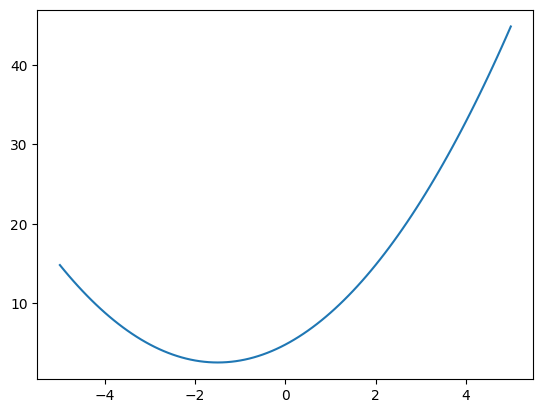

In [17]:
#PREPARING DATA
# Objective Function Definition
def test_objective(x):
	return x**2.0 + 3*x + 4 + (np.random.rand(1))

# Creating a sample objective function
r_min, r_max = -5.0, 5.0
jump = 0.1
X = torch.arange(r_min, r_max+jump, jump).view(-1, 1)
# func = -5 * X
func = test_objective(X)

# Adding Gaussian noise to the function func and saving it in Y
# Y = func + 0.4 * torch.randn(X.size())

# Visualising the sample objective function
plt.plot(X, func)
# show the plot
plt.show()

Vanilla GD Testing

The initial random starting point is set as: [-0.95674764]
[-615652.61983276]
Iteration: 0 || f([61564.30523564]) = 3790348376.64731
[563771.24786377]
Iteration: 1 || f([5187.18044926]) = 26922407.21644
[-53034.06715393]
Iteration: 2 || f([10490.58716466]) = 110083895.81102
[-122832.50689507]
Iteration: 3 || f([22773.83785416]) = 518716016.88233
[379800.02164841]
Iteration: 4 || f([-15206.16431068]) = 231181819.15500
[1556.6945076]
Iteration: 5 || f([-15361.83376144]) = 235939855.84106
[-124144.10710335]
Iteration: 6 || f([-2947.4230511]) = 8678465.01348
[196816.91937149]
Iteration: 7 || f([-22629.11498825]) = 512008962.13010
[-229454.21934128]
Iteration: 8 || f([316.30694588]) = 101003.57965
[103386.54843508]
Iteration: 9 || f([-10022.34789763]) = 100417394.94748
[-463558.58445168]
Iteration: 10 || f([36333.51054754]) = 1320232993.99507
[807883.50105286]
Iteration: 11 || f([-44454.83955775]) = 1976099400.45699
[-466448.06861877]
Iteration: 12 || f([2189.96730413]) = 4802531.56710
[192

<ipython-input-19-c01ee0891122>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gradient[i] = delta / step_size
<ipython-input-16-61c1c1e901ca>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Iteration: %d || f(%s) = %.5f' % (i, solution, solution_eval))


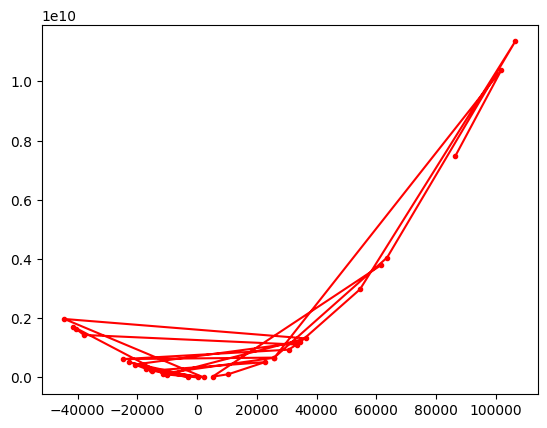

In [23]:
# define range for input
bounds = np.array([[-1.0, 1.0]])
# define the total iterations for the algorithm
n_iter = 30
# define the maximum step size for the algorithm
step_size = 0.1
# perform the gradient descent search
gd_soln, gd_soln_eval = gradient_descent(test_objective, bounds, n_iter, step_size)

#Plotting the progress for the algorithm
# sample input range uniformly at 0.1 increments
inputs = np.arange(bounds[0,0], bounds[0,1]+0.1, 0.1)#np.arange(-5, 5, 0.1)
# compute targets
results = test_objective(inputs)
# create a line plot of input vs result
plt.plot(inputs, results)
# plot the solutions found
plt.plot(gd_soln, gd_soln_eval, '.-', color='red')
# show the plot
plt.show()

GD with Momentum Testing

The initial random starting point is set as: [0.89523346]
[13653.1344773]
Iteration: 0 || f([-1364.41821427]) = 1857548.45848
[-57331.14131726]
Iteration: 1 || f([3959.10188313]) = 15686369.58793
[426254.18119133]
Iteration: 2 || f([-37069.26020678]) = 1374018848.64513
[-505268.81217957]
Iteration: 3 || f([1149.11238421]) = 1323911.29781
[548231.72232136]
Iteration: 4 || f([-42208.54807064]) = 1781434909.50402
[-698626.99508667]
Iteration: 5 || f([14646.85330158]) = 214574257.17475
[-213785.8569622]
Iteration: 6 || f([53082.05940946]) = 2817864281.61484
[-119430.06515503]
Iteration: 7 || f([76555.62775733]) = 5860993812.29297
[258504.86755371]
Iteration: 8 || f([57747.21150632]) = 3334913683.13842
[277746.20056152]
Iteration: 9 || f([24330.06657487]) = 592025134.63311
[169696.33102417]
Iteration: 10 || f([-2664.71000699]) = 7092689.67216
[566960.26865393]
Iteration: 11 || f([-67459.16984694]) = 4550537223.08208
[160233.49761963]
Iteration: 12 || f([-102920.85756088]) = 10592394162.6085

<ipython-input-19-c01ee0891122>:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gradient[i] = delta / step_size
<ipython-input-15-a735e7a690bf>:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Iteration: %d || f(%s) = %.5f' % (i, solution, solution_eval))


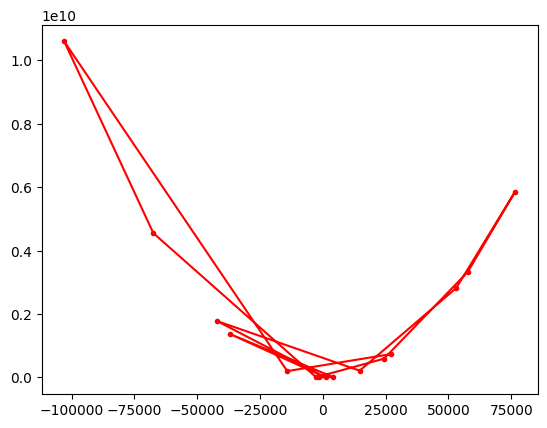

In [24]:
# define range for input
bounds = np.array([[-1.0, 1.0]])
# define the total iterations for the algorithm
n_iter = 15
# define the maximum step size for the algorithm
step_size = 0.1
# setting the momentum
momentum = 0.3
# perform the gradient descent search
gd_soln, gd_soln_eval = gradient_descent_momentum(test_objective, bounds, n_iter, step_size, momentum)

#Plotting the progress for the algorithm
# sample input range uniformly at 0.1 increments
inputs = np.arange(bounds[0,0], bounds[0,1]+0.1, 0.1)#np.arange(-5, 5, 0.1)
# compute targets
results = test_objective(inputs)
# create a line plot of input vs result
plt.plot(inputs, results)
# plot the solutions found
plt.plot(gd_soln, gd_soln_eval, '.-', color='red')
# show the plot
plt.show()

Again we observe Momentum reaching the optima faster

# Adaptive Learning Rate Methods

In [ ]:
import torch
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
from numpy import meshgrid

In [ ]:
def numerical_derivative(objective, point, step_size=1e-6):
    """
    Calculate the numerical derivative of an objective function at a given point using finite differences.

    Parameters:
        objective (function): The objective function to differentiate.
        point (array-like): The point at which to compute the derivative.
        step_size (float, optional): The step size used in the finite difference method. Default is 1e-6.

    Returns:
        ndarray: The numerical derivatives with respect to each variable at the given point.
    """
    num_variables = len(point)
    gradient = np.zeros(num_variables)

    for i in range(num_variables):
        # Perturb the i-th variable
        point_plus = point.copy()
        point_plus[i] += step_size

        # Compute the finite difference
        delta = objective(*point_plus) - objective(*point)
        gradient[i] = delta / step_size

    return gradient

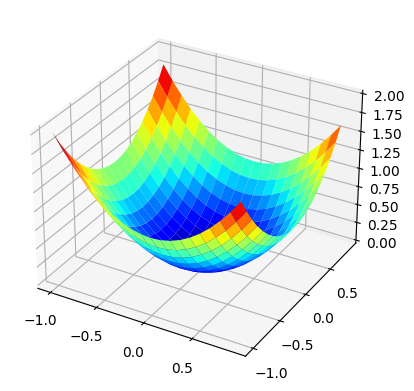

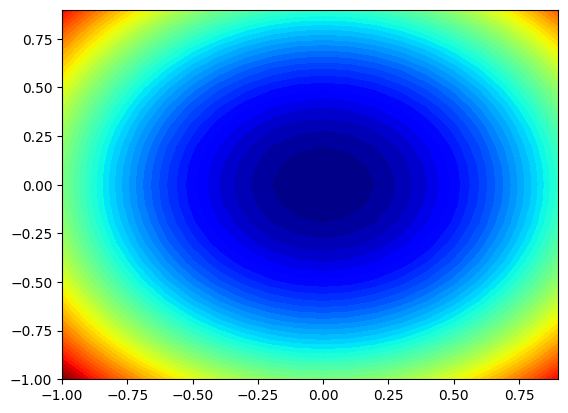

In [ ]:
#Lets define a 2D objective function for this case

# objective function
def TwoDim_objective(x, y):
	return x**2.0 + y**2.0

# define range for input
r_min, r_max = -1.0, 1.0
# sample input range uniformly at 0.1 increments
xaxis = np.arange(r_min, r_max, 0.1)
yaxis = np.arange(r_min, r_max, 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = TwoDim_objective(x, y)
# create a surface plot with the jet color scheme
figure = plt.figure()
#axis = figure.gca(projection='3d')
axis = figure.add_subplot(111, projection='3d')
axis.plot_surface(x, y, results, cmap='jet')
# show the plot
plt.show()


#Contour Plot for the above objective function
# define range for input
bounds = np.array([[-1.0, 1.0], [-1.0, 1.0]])
# sample input range uniformly at 0.1 increments
xaxis = np.arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = np.arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = TwoDim_objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
plt.contourf(x, y, results, levels=50, cmap='jet')
# show the plot
plt.show()

## AdaGrad

AdaGrad, short for Adaptive Gradients, enhances the gradient descent optimization algorithm by dynamically adjusting the step size for each dimension. This adjustment is based on the historical gradients observed during the optimization process, allowing for automatic adaptation to the varying gradients of the variables.

In [ ]:
# gradient descent algorithm with adagrad
def adagrad(objective_fn, bounds, n_iter, step_size):
    adagrad_soln = []
    adagrad_soln_eval = []
    # generate an initial point
    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # list of the sum square gradients for each variable
    sq_grad_sums = [0.0 for _ in range(bounds.shape[0])] #Assigning zero to every variable. Same shape as the number of variables
    # run the gradient descent
    for it in range(n_iter):
        # calculate gradient
        gradient = numerical_derivative(objective_fn, solution) #Same shape as the number of variables
        sq_grad_sums = sq_grad_sums + gradient**2
        alpha = step_size / (1e-8 + np.sqrt(sq_grad_sums))
        solution = solution - (alpha*gradient)
        adagrad_soln.append(solution)
        # evaluate candidate point
        solution_eval = objective_fn(solution[0], solution[1])
        adagrad_soln_eval.append(solution_eval)
        # report progress
        print('>%d f(%s) = %.5f' % (it, solution, solution_eval))
    return [adagrad_soln, adagrad_soln_eval]

>0 f([-0.06595599  0.34064899]) = 0.12039
>1 f([-0.029023    0.27948765]) = 0.07896
>2 f([-0.01298178  0.23463746]) = 0.05522
>3 f([-0.0058252   0.19939965]) = 0.03979
>4 f([-0.0026157   0.17071249]) = 0.02915
>5 f([-0.00117483  0.14686128]) = 0.02157
>6 f([-0.00052784  0.12676122]) = 0.01607
>7 f([-0.0002373   0.10966748]) = 0.01203
>8 f([-0.00010684  0.09503792]) = 0.00903
>9 f([-4.82518421e-05  8.24606103e-02]) = 0.00680
>10 f([-2.19432520e-05  7.16121743e-02]) = 0.00513
>11 f([-1.01292214e-05  6.22324741e-02]) = 0.00387
>12 f([-4.82405991e-06  5.41082548e-02]) = 0.00293
>13 f([-2.44174509e-06  4.70621702e-02]) = 0.00221
>14 f([-1.37195229e-06  4.09451090e-02]) = 0.00168
>15 f([-8.91555450e-07  3.56306455e-02]) = 0.00127
>16 f([-6.75830308e-07  3.10109011e-02]) = 0.00096
>17 f([-5.78957649e-07  2.69933743e-02]) = 0.00073
>18 f([-5.35456424e-07  2.34984545e-02]) = 0.00055
>19 f([-5.15921908e-07  2.04574320e-02]) = 0.00042
>20 f([-5.07149825e-07  1.78108786e-02]) = 0.00032
>21 f([-5.0

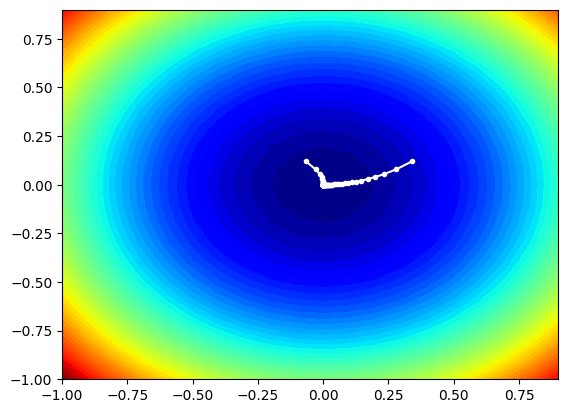

In [ ]:
# seed the pseudo random number generator
np.random.seed(1)# define range for input
bounds = np.array([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 50
# define the step size
step_size = 0.1
# perform the gradient descent search
adagrad_soln, adagrad_soln_eval = adagrad(TwoDim_objective, bounds, n_iter, step_size)


# sample input range uniformly at 0.1 increments
xaxis = np.arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = np.arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = TwoDim_objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
plt.contourf(x, y, results, levels=50, cmap='jet')
plt.plot(adagrad_soln, adagrad_soln_eval, '.-', color='w')
# show the plot
plt.show()

## RMSProp


RMSProp, short for Root Mean Squared Propagation, is a variation of gradient descent similar to AdaGrad. However, instead of accumulating all past gradients equally, RMSProp uses a decaying average of past gradients to adapt the step size for each parameter. By focusing more on recent gradients and less on early ones, RMSProp overcomes the limitations of AdaGrad and achieves better performance in optimizing the objective function.

In [ ]:
# gradient descent algorithm with rmsprop
def rmsprop(objective_fn, bounds, n_iter, step_size, rho):
    rmsprop_soln = []
    rmsprop_soln_eval = []
    # generate an initial point
    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # list of the sum square gradients for each variable
    sq_grad_avg = [0.0 for _ in range(bounds.shape[0])] #Assigning zero to every variable. Same shape as the number of variables
    # run the gradient descent
    for it in range(n_iter):
        # calculate gradient
        gradient = numerical_derivative(objective_fn, solution) #Same shape as the number of variables
        sq_grad = gradient**2
        # update the moving average of the squared gradient
        sq_grad_avg = (np.array(sq_grad_avg) * rho) + (np.array(sq_grad) * (1-rho))
        #compute alpha
        alpha = step_size / (1e-8 + np.sqrt(sq_grad_avg))
        #update soltuion
        solution = solution - (alpha * gradient)
        rmsprop_soln.append(solution)
        # evaluate candidate point
        solution_eval = objective_fn(solution[0], solution[1])
        rmsprop_soln_eval.append(solution_eval)
        # report progress
        print('>%d f(%s) = %.5f' % (it, solution, solution_eval))
    return [rmsprop_soln, rmsprop_soln_eval]

>0 f([-0.061611    0.27043901]) = 0.07693
>1 f([-0.02583242  0.21128195]) = 0.04531
>2 f([-0.01092417  0.1691551 ]) = 0.02873
>3 f([-0.00460076  0.13705208]) = 0.01880
>4 f([-0.00192534  0.11176056]) = 0.01249
>5 f([-0.00080032  0.09146385]) = 0.00837
>6 f([-0.0003305   0.07499739]) = 0.00562
>7 f([-0.00013568  0.06155064]) = 0.00379
>8 f([-5.54710319e-05  5.05268212e-02]) = 0.00255
>9 f([-2.26900458e-05  4.14691679e-02]) = 0.00172
>10 f([-9.39074770e-06  3.40185277e-02]) = 0.00116
>11 f([-4.03535637e-06  2.78872711e-02]) = 0.00078
>12 f([-1.89508657e-06  2.28421640e-02]) = 0.00052
>13 f([-1.04626016e-06  1.86925137e-02]) = 0.00035
>14 f([-7.12219244e-07  1.52815768e-02]) = 0.00023
>15 f([-5.81792302e-07  1.24800896e-02]) = 0.00016
>16 f([-5.31270667e-07  1.01812483e-02]) = 0.00010
>17 f([-5.11858033e-07  8.29672495e-03]) = 0.00007
>18 f([-5.04459554e-07  6.75345215e-03]) = 0.00005
>19 f([-5.01663126e-07  5.49099801e-03]) = 0.00003
>20 f([-5.00614984e-07  4.45940652e-03]) = 0.00002
>21

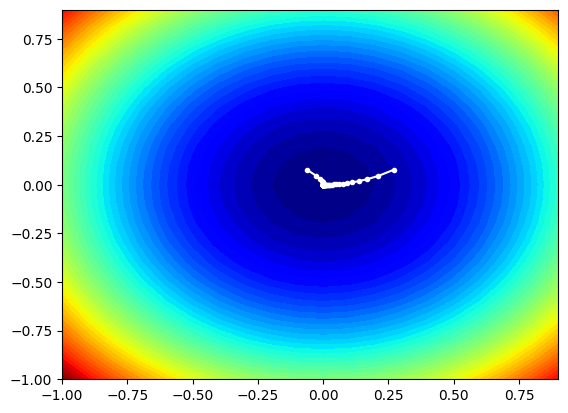

In [ ]:
# seed the pseudo random number generator
# np.random.seed(1)# define range for input
# define range for input
bounds = np.array([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 60
# define the step size
step_size = 0.01
# momentum for rmsprop
rho = 0.99
# perform the gradient descent search with rmsprop
rmsprop_soln, rmsprop_soln_eval = rmsprop(TwoDim_objective, bounds, n_iter, step_size, rho)

# sample input range uniformly at 0.1 increments
xaxis = np.arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = np.arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = TwoDim_objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
plt.contourf(x, y, results, levels=50, cmap='jet')
# plot the sample as black circles
plt.plot(rmsprop_soln, rmsprop_soln_eval, '.-', color='w')

## ADAM

Adam, short for Adaptive Movement Estimation, represents a further advancement in gradient descent techniques, following in the footsteps of methods like AdaGrad and RMSProp. It automatically adjusts the learning rate for each variable in the objective function and enhances the search process by employing an exponentially decaying moving average of the gradient to update the variables more smoothly.

In [ ]:
# gradient descent algorithm with adam
def adam(objective_fn, bounds, n_iter, alpha, beta1, beta2, eps = 1e-8):
    adam_soln = []
    adam_soln_eval = []
    # generate an initial point
    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # list of the sum square gradients for each variable
    m = [0.0 for _ in range(bounds.shape[0])] #Initialise first moment
    v = [0.0 for _ in range(bounds.shape[0])] #Initialise second moment
    # run the gradient descent
    for t in range(n_iter):
        # calculate gradient
        grad = numerical_derivative(objective_fn, solution) #Same shape as the number of variables

        # Update the moments
        m = beta1*np.array(m) + (1-beta1)*grad
        v = beta2*np.array(v) + (1-beta2)*(grad**2)

        # Update the secondary parameters
        m_hat = m/(1 - beta1**(t+1))
        v_hat = v/(1 - beta2**(t+1))

        # Update the solution
        solution = solution - alpha * (m_hat/(np.sqrt(v_hat) + eps))
        adam_soln.append(solution)
        solution_eval = objective_fn(solution[0], solution[1])
        adam_soln_eval.append(solution_eval)

        # report progress
        print('>%d f(%s) = %.5f' % (t, solution, solution_eval))
    return [adam_soln, adam_soln_eval]

>0 f([-0.27920908 -0.24823736]) = 0.13958
>1 f([-0.25929748 -0.22833794]) = 0.11937
>2 f([-0.23954101 -0.20861638]) = 0.10090
>3 f([-0.2200119  -0.18915735]) = 0.08419
>4 f([-0.20078738 -0.17005245]) = 0.06923
>5 f([-0.1819489 -0.1513993]) = 0.05603
>6 f([-0.16358126 -0.13330036]) = 0.04453
>7 f([-0.14577135 -0.1158612 ]) = 0.03467
>8 f([-0.1286067  -0.09918833]) = 0.02638
>9 f([-0.11217377 -0.08338649]) = 0.01954
>10 f([-0.09655595 -0.06855557]) = 0.01402
>11 f([-0.08183144 -0.0547871 ]) = 0.00970
>12 f([-0.06807092 -0.04216071]) = 0.00641
>13 f([-0.05533538 -0.03074057]) = 0.00401
>14 f([-0.0436739  -0.02057236]) = 0.00233
>15 f([-0.03312181 -0.01168077]) = 0.00123
>16 f([-0.02369928 -0.0040681 ]) = 0.00058
>17 f([-0.01541038  0.00228625]) = 0.00024
>18 f([-0.00824277  0.00742503]) = 0.00012
>19 f([-0.00216808  0.01141143]) = 0.00013
>20 f([0.00285718 0.01432649]) = 0.00021
>21 f([0.00689009 0.01626584]) = 0.00031
>22 f([0.00999941 0.01733612]) = 0.00040
>23 f([0.01226333 0.01765125]

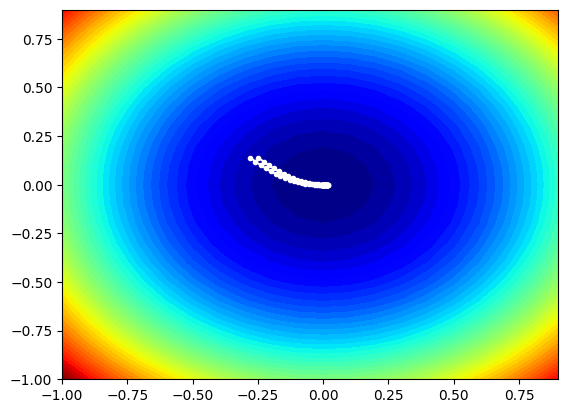

In [ ]:
# define range for input
bounds = np.array([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 60
# steps size
alpha = 0.02
# factor for average gradient
beta1 = 0.8
# factor for average squared gradient
beta2 = 0.999
# perform the gradient descent search with adam
adam_soln, adam_soln_eval = adam(TwoDim_objective, bounds, n_iter, alpha, beta1, beta2)

# sample input range uniformly at 0.1 increments
xaxis = np.arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = np.arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = TwoDim_objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
plt.contourf(x, y, results, levels=50, cmap='jet')
plt.plot(adam_soln, adam_soln_eval, '.-', color='w')

## AMSGrad


AMSGrad, or Adaptive Moment Estimation with Maximum Squares, is a refinement of the Adam optimization algorithm. While Adam is known for its adaptive learning rate and momentum features, AMSGrad addresses a specific issue related to the adaptive learning rate behavior of Adam. By maintaining a maximum of past squared gradients, AMSGrad ensures that the learning rate monotonically decreases or remains constant, preventing excessive learning rate increases observed in Adam.

In [ ]:
# gradient descent algorithm with amsgrad
def amsgrad(objective_fn, bounds, n_iter, alpha, beta1, beta2):
    amsgrad_soln = []
    amsgrad_soln_eval = []
    # generate an initial point
    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # list of the sum square gradients for each variable
    m = [0.0 for _ in range(bounds.shape[0])] #Initialise first moment
    v = [0.0 for _ in range(bounds.shape[0])] #Initialise second moment
    v_hat = [0.0 for _ in range(bounds.shape[0])]
    # run the gradient descent
    for t in range(n_iter):
        # calculate gradient
        grad = numerical_derivative(objective_fn, solution) #Same shape as the number of variables

        # Update the moments
        m = ((beta1**(t+1)) * np.array(m)) + ((1-(beta1**(t+1))) * grad)
        v = (beta2 * np.array(v)) + ((1-beta2)*(grad**2))
        #Updat secondary parameter
        v_hat = np.maximum(v_hat, v)

        # Update the solution
        solution = solution - alpha * (m/(np.sqrt(v_hat) + 1e-8))
        amsgrad_soln.append(solution)
        solution_eval = objective_fn(solution[0], solution[1])
        amsgrad_soln_eval.append(solution_eval)

        # report progress
        print('>%d f(%s) = %.5f' % (t, solution, solution_eval))
    return [amsgrad_soln, amsgrad_soln_eval]

>0 f([-0.15895599  0.43364899]) = 0.21332
>1 f([-0.1456267   0.42024471]) = 0.19781
>2 f([-0.12718612  0.40142255]) = 0.17732
>3 f([-0.10590871  0.37903407]) = 0.15488
>4 f([-0.08436884  0.35511102]) = 0.13322
>5 f([-0.0647253   0.33132987]) = 0.11397
>6 f([-0.04828299  0.30876899]) = 0.09767
>7 f([-0.03542867  0.28793248]) = 0.08416
>8 f([-0.02586476  0.26891822]) = 0.07299
>9 f([-0.0189691  0.2516062]) = 0.06367
>10 f([-0.01405382  0.23579764]) = 0.05580
>11 f([-0.01053397  0.22129103]) = 0.04908
>12 f([-0.00797866  0.20791178]) = 0.04329
>13 f([-0.00609345  0.19551738]) = 0.03826
>14 f([-0.00468254  0.18399297]) = 0.03388
>15 f([-0.00361479  0.17324529]) = 0.03003
>16 f([-0.00280014  0.16319744]) = 0.02664
>17 f([-0.0021749   0.15378495]) = 0.02365
>18 f([-0.0016929   0.14495295]) = 0.02101
>19 f([-0.00132005  0.13665415]) = 0.01868
>20 f([-0.00103084  0.12884735]) = 0.01660
>21 f([-0.00080602  0.12149629]) = 0.01476
>22 f([-0.00063091  0.11456991]) = 0.01313
>23 f([-0.00049431  0.1

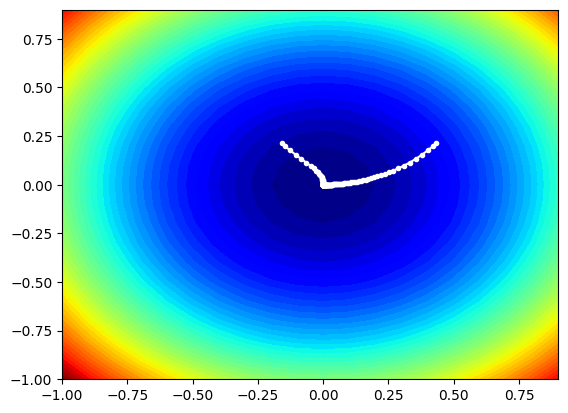

In [ ]:
# seed the pseudo random number generator
np.random.seed(1)# define range for input
# define range for input
bounds = np.array([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 100
# steps size
alpha = 0.007
# factor for average gradient
beta1 = 0.9
# factor for average squared gradient
beta2 = 0.99
# perform the gradient descent search with amsgrad
amsgrad_soln, amsgrad_soln_eval = amsgrad(TwoDim_objective, bounds, n_iter, alpha, beta1, beta2)
print('Done!')


# sample input range uniformly at 0.1 increments
xaxis = np.arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = np.arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = TwoDim_objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
plt.contourf(x, y, results, levels=50, cmap='jet')
plt.plot(amsgrad_soln, amsgrad_soln_eval, '.-', color='w')